###### Title: Tip Prediction and analysis of dataset.
###### Author: Prithwiswar Bhattacharya
###### Task summary: To predict the tip if the total bill is $28

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
tips=pd.read_csv("tips.csv")

In [3]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


## DATA VISUALISATION:

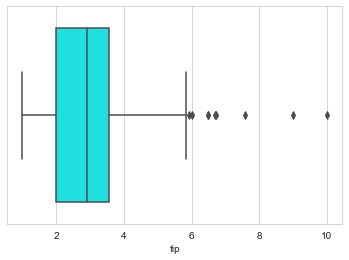

In [4]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'tip', data = tips,color="cyan") 

In [5]:
q1=np.quantile(tips.tip,.25)
q2=np.quantile(tips.tip,.50)
q3=np.quantile(tips.tip,.75)

iqr=q3-q1
iqr=round(iqr,2)
print("InterQuatile Range:", iqr)
l = q1 - (1.5*iqr)
u = q1 + (1.5*iqr)
l = round(l,2)
u = round(u,2)
print("Lower range in boxplot is {}, & the upper range is, {}".format(l,u))

InterQuatile Range: 1.56
Lower range in boxplot is -0.34, & the upper range is, 4.34


We can observe the outliers in tip but lets check for total bill.

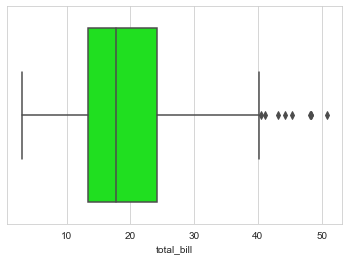

In [6]:
sns.boxplot(x="total_bill", data = tips,color="lime")

In [7]:
q1=np.quantile(tips.total_bill,.25)
q2=np.quantile(tips.total_bill,.50)
q3=np.quantile(tips.total_bill,.75)

iqr=q3-q1
iqr=round(iqr,2)
print("InterQuatile Range:", iqr)
l = q1 - (1.5*iqr)
u = q1 + (1.5*iqr)
l = round(l,2)
u = round(u,2)
print("Lower range in boxplot is {}, & the upper range is, {}".format(l,u))

InterQuatile Range: 10.78
Lower range in boxplot is -2.82, & the upper range is, 29.52


We can observe that there is outlier in total_bills too. Lets further dive into the dataset.

###### Lets do the analysis on the basis of sex.

In [8]:
sex = tips.groupby(['sex']).count().reset_index()

In [9]:
sex.head(2)

,sex,total_bill,tip,smoker,day,time,size
0,Female,87,87,87,87,87,87
1,Male,157,157,157,157,157,157


In [10]:
sex=sex.drop(columns='smoker')

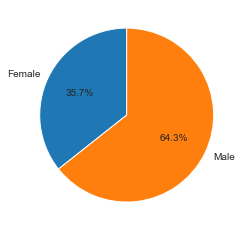

In [11]:
#piechart
sex['count'] = (sex['total_bill']/ len(tips)) *100 

plt.pie(x='count',data=sex,labels=['Female', 'Male'], autopct='%2.1f%%', startangle=90)
plt.show()

We can see from the piechart that mostly male has given tip than female.

###### Lets check smoker has given more tip or not?

In [12]:
tips.groupby(['sex','smoker']).mean()['tip']

sex     smoker
Female  No        2.773519
        Yes       2.931515
Male    No        3.113402
        Yes       3.051167
Name: tip, dtype: float64

In [13]:
tips['p_tip'] = tips['tip']/tips['total_bill']

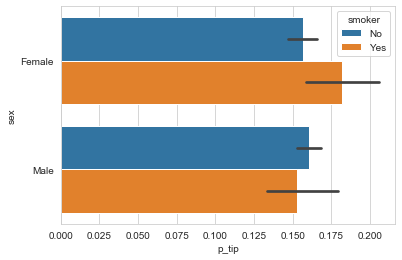

In [14]:
sns.barplot(x='p_tip',y='sex',hue='smoker',data=tips)

We can make a analysis that female smoker gives more tip than non-smoker while its opposite for male.

###### Total Bill vs Tips

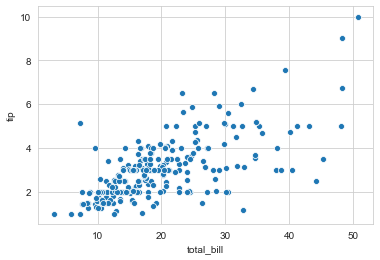

In [15]:
sns.scatterplot(x="total_bill", y = "tip",data = tips)

We can apply Linear Regression on this model since we can pass a kernel in the scatterplot.

## Machine Learning:

In [20]:
df = tips.filter(['total_bill','tip'], axis=1)#extracting the two rows and implementing the Linear Reg() on them

In [21]:
df.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [22]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [23]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [25]:
pred = regressor.predict(X_test)

In [26]:
data = {
    'Actual': y_test.flatten(),
    'Predicted': pred.flatten(),
}
df2=pd.DataFrame(data)

In [27]:
df2.head(4)

,Actual,Predicted
0,2.64,2.714869
1,3.76,2.786393
2,3.51,2.909005
3,1.00,1.658362


In [28]:
#mean error in model:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, pred))

Mean Absolute Error: 0.6903119067790223


In [32]:
pred_=regressor.predict(np.array([28]).reshape(1, 1))
print("Total Bill = ${}".format(28))
print("Predicted Tip using Linear Regression = ${}".format(pred_[0]))

Total Bill = $28
Predicted Tip using Linear Regression = $3.778527982056764
